In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import log_loss

In [4]:
#Plot and image tools
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style("dark")

/Users/Ang/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [5]:
cd /Users/Ang/OneDrive/Documents/Pitt_PhD/Class/2018Spring/ML/finalProject/data

/Users/Ang/OneDrive/Documents/Pitt_PhD/Class/2018Spring/ML/finalProject/data


In [7]:
ls

Data Description.txt        test.csv
all_clean_comments_lst.pkl  test.csv.zip
all_toxic_comments_lst.pkl* test_features.csv*
dictionary/                 train.csv
sample_submission.csv       train.csv.zip
sample_submission.csv.zip   train_features.csv*


In [9]:
train = pd.read_csv("train_features.csv")

In [20]:
train.shape

(159571, 25)

In [17]:
rowsums=train.iloc[:,18:].sum(axis=1)
train['clean']=(rowsums==0)
train['clean'].sum()

143346

In [18]:
print('Total rows in train is {}'.format(len(train)))
print(train.iloc[:,18:].sum())

Total rows in train is 159571
toxic             15294.0
severe_toxic       1595.0
obscene            8449.0
threat              478.0
insult             7877.0
identity_hate      1405.0
clean            143346.0
dtype: float64


In [23]:
print("percentage of labeled data is: ", (159571 - 143346)/159571)

percentage of labeled data is:  0.10167887648758234


In [24]:
train.columns.values

array(['id', 'total_length', 'capitals', 'caps_vs_length',
       'num_exclamation_marks', 'num_question_marks', 'num_punctuation',
       'num_symbols', 'num_we', 'num_words', 'num_unique_words',
       'words_vs_unique', 'num_smilies', 'num_IP', 'num_URL',
       'num_positive', 'num_negtive', 'score', 'toxic', 'severe_toxic',
       'obscene', 'threat', 'insult', 'identity_hate', 'clean'],
      dtype=object)

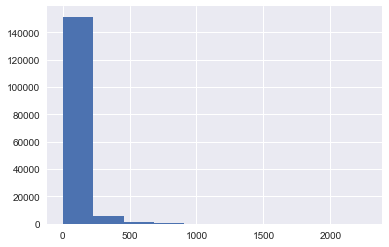

In [26]:
# look at the histogram plot for text length
sns.set()
train['num_words'].hist()
plt.show()

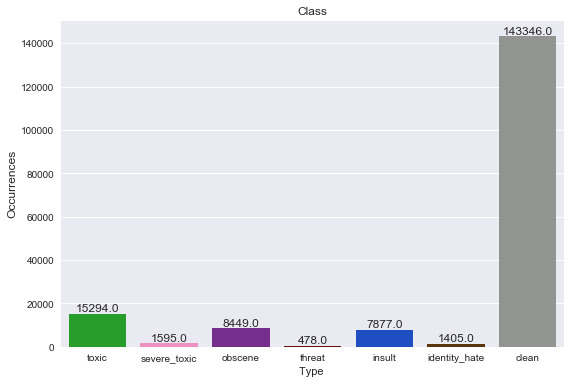

In [36]:
colors_list = ["green", "pink", "purple",
               "blood", "blue", "brown", "grey"]

palette= sns.xkcd_palette(colors_list)

x=train.iloc[:,18:].sum()

plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Type ')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

plt.show()